**TITLE : CUSTOMER SEGMENTATION ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

**DATA LOADING**

In [ ]:
df = pd.read_csv("ifood_df.csv", encoding="utf-8")
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


**EXPLORING AND CLEANING DATA**

In [ ]:
#looking for all the columns in the data
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
#displaying firt 5 rows
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [ ]:
#displaying last 5 rows
df.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0
2204,52869,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1,66,2781,0,1,0,0,0,0,0,0,0,1,151,130,0


In [ ]:
#finding the number of rows and columns in the data
df.shape

(2205, 39)

In [ ]:
#finding null values present in the data
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

In [ ]:
#finding the number of unique values in each column
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [ ]:
#finding the datatypes for each column
df.dtypes

Income                  int64
Kidhome                 int64
Teenhome                int64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
Age                     int64
Customer_Days           int64
marital_Divorced        int64
marital_Married         int64
marital_Single          int64
marital_Together        int64
marital_Widow           int64
education_2n Cycle      int64
education_Basic         int64
education_

**DESCRIPTIVE STATISTICS**

In [ ]:
#describe the statistics for numerical columns
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
# Calculate Average Purchase Value based on products purchased
total_amount_spent = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
average_purchase = total_amount_spent.mean()

print("Average Purchase Value:", average_purchase)

Average Purchase Value: 606.821768707483


In [ ]:
# Calculating total purchase made using discounts
deal = df['NumDealsPurchases'].sum()
print('Total number of purchases made with discounts: ',deal)

Total number of purchases made with discounts:  5112


In [ ]:
# calculating total purchase made using catalog
catalog = df['NumCatalogPurchases'].sum()
print('Total number of purchases made using catalog: ',catalog)

Total number of purchases made using catalog:  5833


In [ ]:
# calculating total purchase made directly from store
store = df['NumStorePurchases'].sum()
print('Total number of purchases made directly in stores: ',store)

Total number of purchases made directly in stores:  12841


In [ ]:
# calculating total purchase made through online
web = df['NumWebPurchases'].sum()
print('Total number of purchases made through online website: ',web)

Total number of purchases made through online website:  9042


In [ ]:
# Calculate Average Age of Customers
average_age = df['Age'].mean()

print("Average Age of Customers:", average_age)

Average Age of Customers: 51.09569160997732


In [ ]:
# Calculate Average Income of Customers
average_income = df['Income'].mean()

print("Average Income of Customers:", average_income)

Average Income of Customers: 51622.0947845805


In [ ]:
# Count of kinds in home
kids = df['Kidhome'].value_counts()

#0 refers no kids
#1 refers 1 kid
#2 refers 2 kids
print("Number of Kids in home:", kids)

Number of Kids in home: Kidhome
0    1276
1     883
2      46
Name: count, dtype: int64


In [ ]:
# Count of kinds in home
teen = df['Teenhome'].value_counts()

#0 refers no teen
#1 refers 1 teen
#2 refers 2 teens
print("Number of Teens in home:", teen)

Number of Teens in home: Teenhome
0    1139
1    1015
2      51
Name: count, dtype: int64


**CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING ALGORITHM**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# columns for clustering
X = df[['Income', 'MntTotal', 'Age']]

In [ ]:
# Scale the columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# number of clusters
num_clusters = 3

In [ ]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Getting cluster labels
cluster_labels = kmeans.labels_

In [ ]:
# Adding cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

In [ ]:
# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
cluster_centers_df

,Income,MntTotal,Age
0,33808.410651,122.640237,42.939645
1,73736.900404,1242.810229,50.862719
2,49387.512156,346.607780,62.546191


**VISUALIZATION**

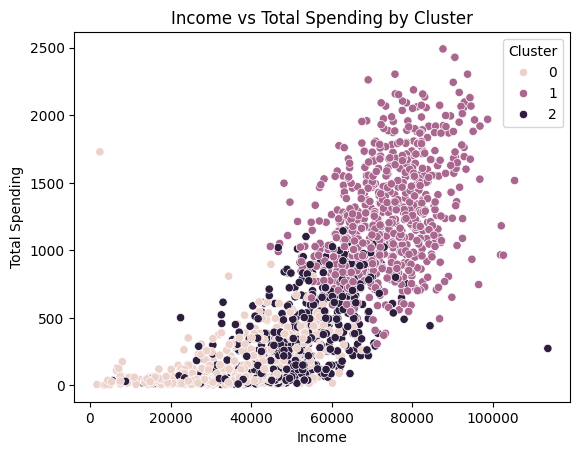

In [ ]:
# plotting scatter plot for Income of customer and total amount spent on purchase
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df)
plt.title('Income vs Total Spending by Cluster')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

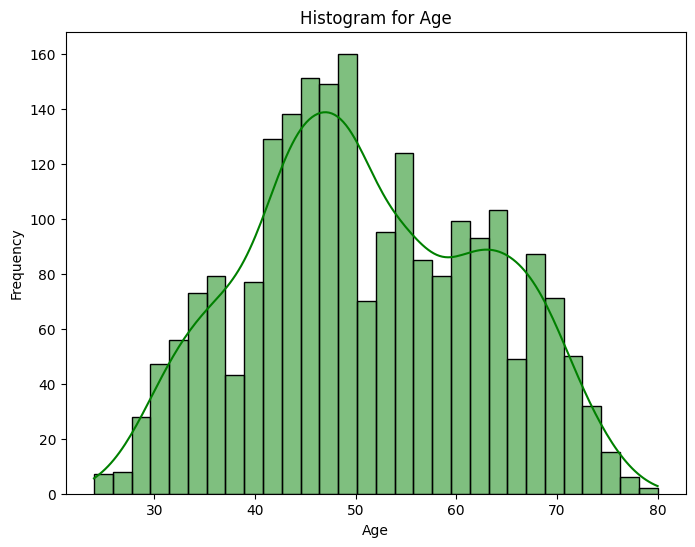

In [ ]:
# plotting histogram plot for customer age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='green')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-126-021ac4d9d8c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')


Text(0, 0.5, 'MntTotal')

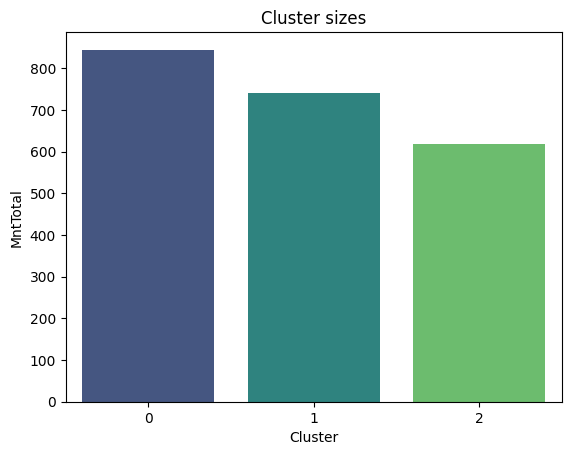

In [ ]:
# plotting bar chart based on cluster and amount spent on purchase
cluster_sizes = df.groupby('Cluster')[['MntTotal']].count().reset_index()
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

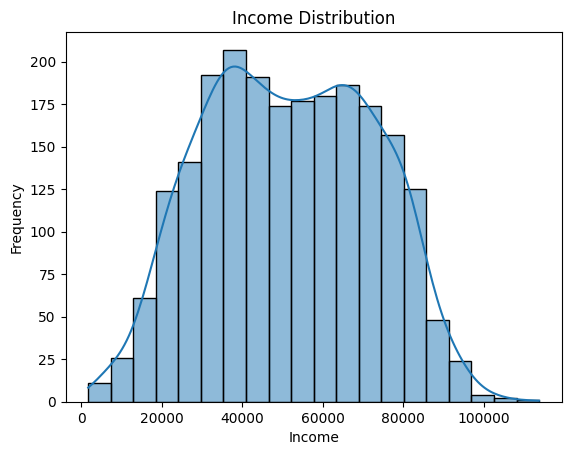

In [ ]:
# plotting histogram for income distribution
sns.histplot(data=df, x='Income', bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

**INSIGHTS**

1. Cluster 0 - Lower Income customers spending lesser amount on purchase
2. Cluster 1 - Higher Income customers spending high amount on purchase
3. Cluster 2 - Averagew in terms of Income and Spending

**RECOMMENDATIONS**

1. Utilize social media advertising platforms like Facebook Ads, Instagram Ads, or LinkedIn Ads to target specific demographics based on age, location, interests, and behaviors.
2. Create high-quality, engaging content such as blog posts, videos, infographics, and tutorials related to your industry or products.
3. Implement a referral program where existing customers are rewarded for referring new customers to your business.
Focus on providing exceptional customer service and personalized experiences to existing customers.